In [1]:
from ay_torch import *

In [2]:
dset_train= torchvision.datasets.MNIST(
              root='./data_downloaded/',
              train=True,
              transform=torchvision.transforms.ToTensor(),
              download=True)
dset_test= torchvision.datasets.MNIST(
              root='./data_downloaded/',
              train=False,
              transform=torchvision.transforms.ToTensor(),
              download=True)
#NOTE: Adjust the batch size.
n_batch= 64
dl_train= torch.utils.data.DataLoader(
              dataset=dset_train,
              batch_size=n_batch,
              shuffle=True,
              num_workers=2)
dl_test= torch.utils.data.DataLoader(
              dataset=dset_test,
              batch_size=n_batch,
              shuffle=False,
              num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data_downloaded/MNIST/raw/train-images-idx3-ubyte.gz to ./data_downloaded/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data_downloaded/MNIST/raw/train-labels-idx1-ubyte.gz to ./data_downloaded/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data_downloaded/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data_downloaded/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data_downloaded/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_downloaded/MNIST/raw



/home/akihikoy/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1],dset_train.classes[dset_train[0][1]])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1],dset_test.classes[dset_test[0][1]])

dset_train size: 60000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([1, 28, 28])
dset_train[0] label value: 5 5 - five
dset_train[0][0] value range: tensor(0.) tensor(1.)
dset_test size: 10000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([1, 28, 28])
dset_test[0] label value: 7 7 - seven


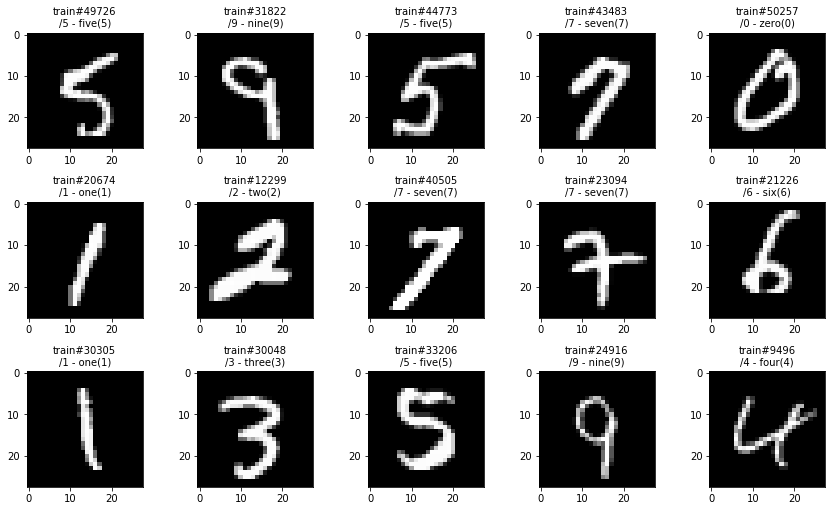

In [10]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n/{d.classes[d[i][1]]}({d[i][1]})' for i in idxes]
PlotImgGrid(imgs, labels)

In [13]:
#Setup a neural network.
net= TResNet18(in_channels=1, out_channels=len(dset_train.classes))

#Load pretrained model parameters.
# url= 'https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth'
# net.load_state_dict(torchvision.models.utils.load_state_dict_from_url(url, map_location='cpu')['model'], strict=False)

device= torch.device('cuda')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
# f_loss= torch.nn.MSELoss()
f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred.max(1).indices

def accuracy(y,y_trg):
  return (decode(y)==y_trg).sum().item()/len(y_trg)
f_metric= accuracy

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

In [14]:
input_size= (1,)+dset_train[0][0].shape
print(f'input_size={input_size}')
torchinfo.summary(net, input_size)

input_size=(1, 1, 28, 28)


/home/akihikoy/.local/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Layer (type:depth-idx)                        Output Shape              Param #
TResNet                                       --                        --
├─Sequential: 1-1                             [1, 32, 28, 28]           --
│    └─Conv2d: 2-1                            [1, 32, 28, 28]           288
│    └─BatchNorm2d: 2-2                       [1, 32, 28, 28]           64
│    └─ReLU: 2-3                              [1, 32, 28, 28]           --
├─Sequential: 1-2                             [1, 32, 14, 14]           --
│    └─Conv2d: 2-4                            [1, 32, 14, 14]           9,216
│    └─BatchNorm2d: 2-5                       [1, 32, 14, 14]           64
│    └─ReLU: 2-6                              [1, 32, 14, 14]           --
├─Sequential: 1-3                             [1, 64, 7, 7]             --
│    └─Conv2d: 2-7                            [1, 64, 7, 7]             18,432
│    └─BatchNorm2d: 2-8                       [1, 64, 7, 7]             128
│    └─ReLU

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


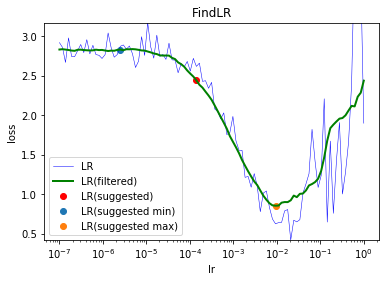

lr= 0.00014125375446227543, lr_min=2.5118864315095806e-06, lr_max=0.009332543007969905


In [15]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(test)	time
2	0.06750328	0.05404774	0.98347930	22.849726
3	0.05047503	0.03200548	0.98915207	23.208297
4	0.01644084	0.01942248	0.99263535	22.980466


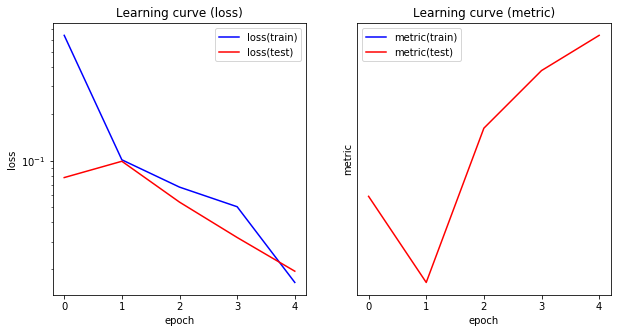

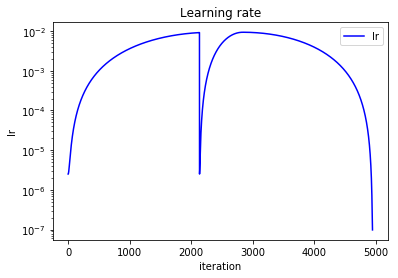

In [17]:
FitOneCycle(net, n_epoch=3, lr_max=lr_max, div_init=lr_max/lr_min, 
    opt=opt, f_loss=f_loss, f_metric=f_metric,
    dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
    callbacks=(logger.Callbacks(),disp.Callbacks()),
    device=device)
logger.Plot()
logger.PlotLR()

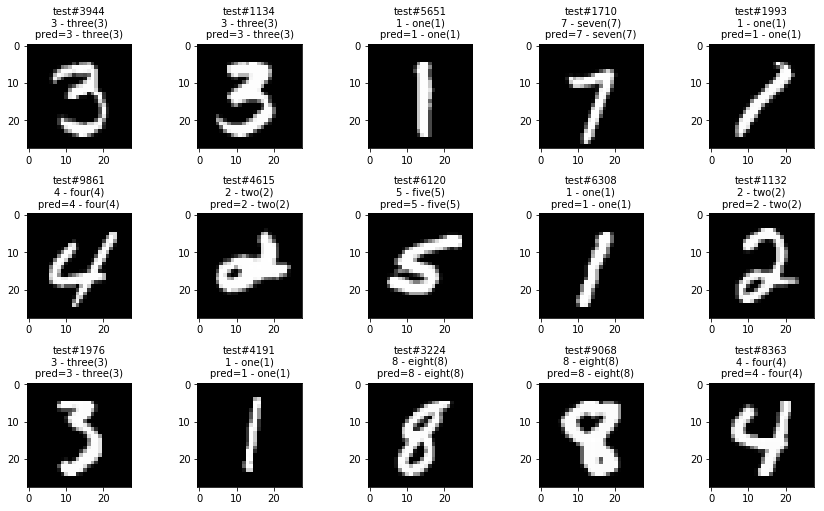

In [20]:
d= dset_test
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
pred= decode(Eval(net,imgs,device=device)).cpu()
labels= [f'test#{i}\n{d.classes[d[i][1]]}({d[i][1]})\npred={d.classes[lp]}({lp})' for i,lp in zip(idxes,pred)]
PlotImgGrid(imgs, labels)